In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

Load the data set

In [4]:
file_path = "/Volumes/Code/BostonHousingModel/data/Boston Housing Data.csv"
df = pd.read_csv(file_path)

Display the first few rows 

In [6]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


Basic understanding of data

In [7]:
print("Dataset Info:")
df.info()
print(f"\nSummary statistics:\n{df.describe()}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB

Summary statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083

Handling of missing values

In [8]:
missing_values = df.isnull().sum()
print(f"missing value in each column is:")
print(missing_values)

missing value in each column is:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


Fill the missing values with median of the respective column

In [9]:
df.fillna(df.median(), inplace= True)
print("\nMissing Values After Treatment:")
print(df.isnull().sum())


Missing Values After Treatment:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Handling outliers

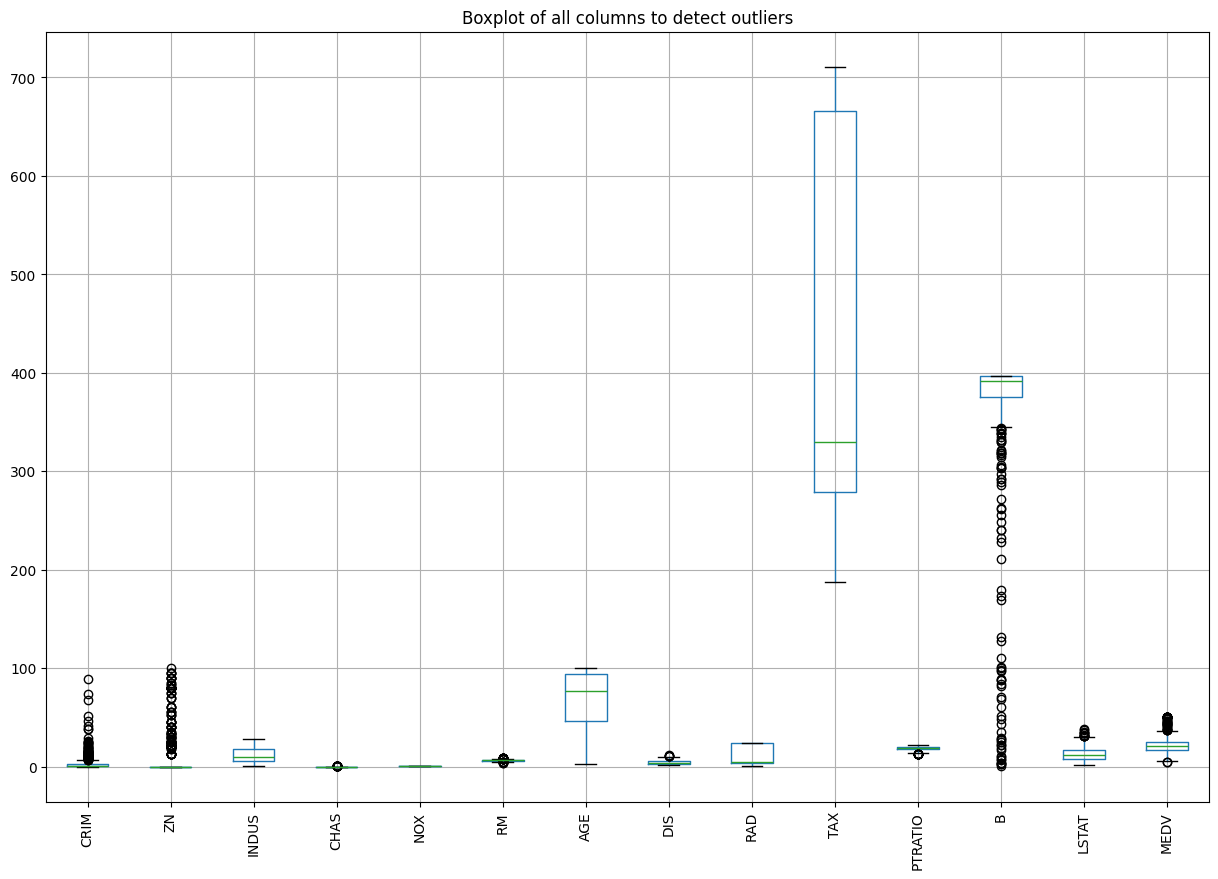

In [10]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of all columns to detect outliers')
plt.show()

Remove all outliers using Z-score

In [11]:
z_score = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df_clean = df[(z_score<3).all(axis=1)]
print(f"\nNumber of rows after outlier removal: {df_clean.shape[0]} (original: {df.shape[0]})")


Number of rows after outlier removal: 403 (original: 506)


Analysing variables strongly affecting prices

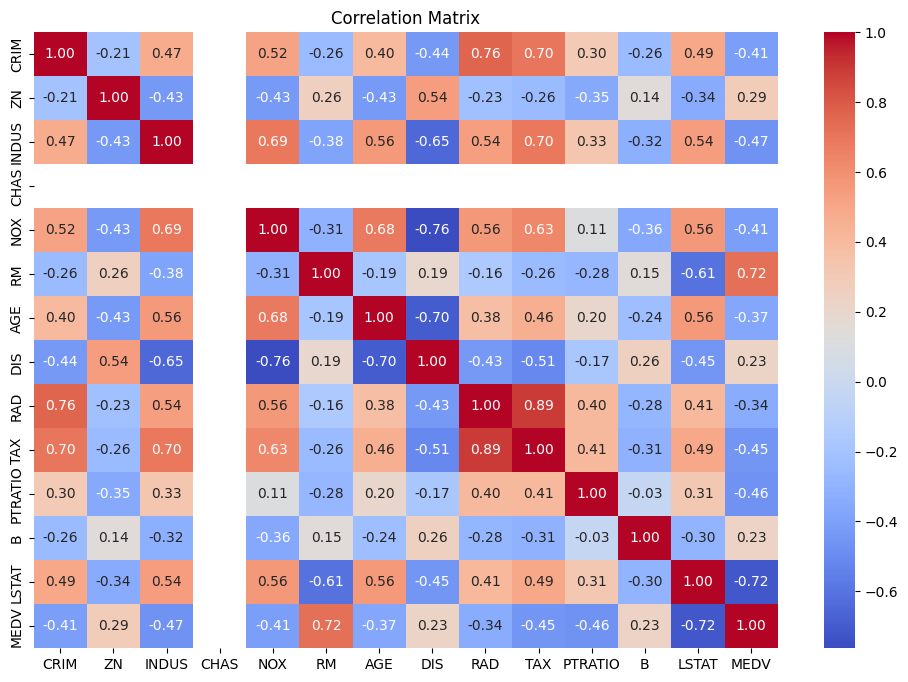

In [12]:
corr_matrix = df_clean.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Variables strongly affecting housing rates

In [13]:
important_variables = df_clean.corr()['MEDV'].sort_values(ascending=False)
print("\nVariables most strongly affecting house prices:")
print(important_variables)


Variables most strongly affecting house prices:
MEDV       1.000000
RM         0.722256
ZN         0.286167
B          0.233092
DIS        0.226430
RAD       -0.341644
AGE       -0.366643
NOX       -0.410173
CRIM      -0.410948
TAX       -0.450637
PTRATIO   -0.462324
INDUS     -0.472070
LSTAT     -0.715284
CHAS            NaN
Name: MEDV, dtype: float64


Prepare the dataset for linear regression

In [14]:
x = df_clean.drop(columns=['MEDV']) #features
y = df_clean['MEDV'] #Targets

In [15]:
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size = 0.2,random_state = 42)

Initialising and traing the regression model

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Predict on the test set

In [17]:
y_pred = model.predict(X_test)

Evaluate the model

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Mean Absolute Error (MAE): 2.9518155082043664
Mean Squared Error (MSE): 23.193129393255944
R-squared (R^2): 0.6369576181720203


Plotting predicted vs actual values

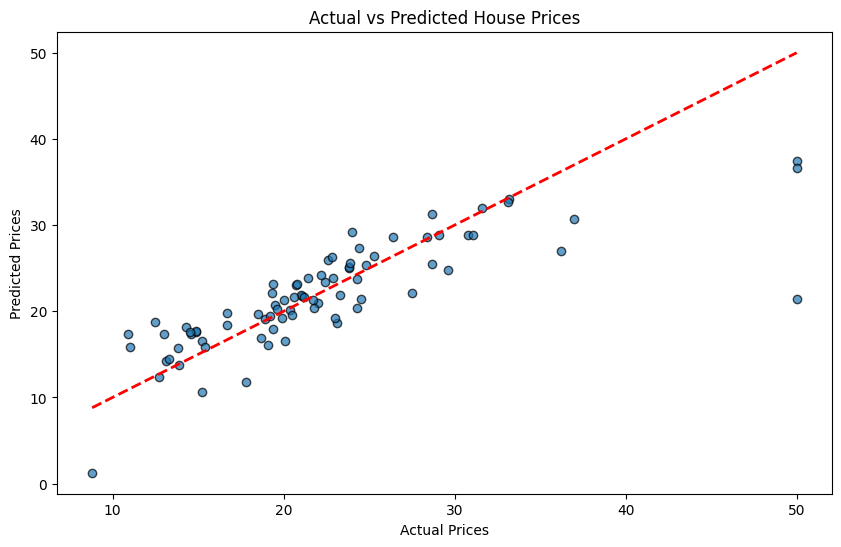

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.7,edgecolors='k')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max(),],'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

Saving the model

In [21]:
model_path = 'linear_regression_model.pkl'
joblib.dump(model,model_path)
print(f"model saved in {model_path}")

model saved in linear_regression_model.pkl
